In [1]:
import pandas as pd
import numpy as np
    
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px
from plotly.offline import init_notebook_mode, iplot, plot
from plotly.subplots import make_subplots
import plotly.graph_objects as go

### Dataset Info
- NBA statistics for every pick, along with NCAA stat page links for data scraping

In [2]:
df = pd.read_csv('draft-data-20-years.csv')

In [3]:
df.head()

Unnamed: 0  Rk  Pk   Tm              Player       College   Yrs       G  \
0           1   1   1  BRK     Derrick Coleman      Syracuse  15.0   781.0   
1           2   2   2  OKC         Gary Payton  Oregon State  17.0  1335.0   
2           3   3   3  DEN  Mahmoud Abdul-Rauf           LSU   9.0   586.0   
3           4   4   4  ORL        Dennis Scott  Georgia Tech  10.0   629.0   
4           5   5   5  CHA        Kendall Gill      Illinois  15.0   966.0   

     TOTMP   TOTPTS  ...  WS/48  BPM  VORP  DraftYr   MPG   PPG  RPG  APG  \
0  25903.0  12884.0  ...  0.119  1.4  22.3     1990  33.2  16.5  9.3  2.5   
1  47117.0  21813.0  ...  0.148  3.3  62.5     1990  35.3  16.3  3.9  6.7   
2  15628.0   8553.0  ...  0.077 -0.8   4.5     1990  26.7  14.6  1.9  3.5   
3  17983.0   8094.0  ...  0.089  0.2   9.9     1990  28.6  12.9  2.8  2.1   
4  29481.0  12914.0  ...  0.078  0.1  15.8     1990  30.5  13.4  4.1  3.0   

                                           playerurl  DraftYear  
0  https://www.sports-reference.com/cbb/players/d...       1990  
1  https://www.sports-reference.com/cbb/players/g...       1990  
2  https://www.sports-reference.com/cbb/players/m...       1990  
3  https://www.sports-reference.com/cbb/players/d...       1990  
4  https://www.sports-reference.com/cbb/players/k...       1990  

[5 rows x 26 columns]

### Feature Descriptions
- **Rk and Pk**: Corresponds to the pick with which a player was selected in the NBA draft.
- **Tm**: The NBA team that drafted a player.
- **Player**: The name of the player.
- **College**: The college an NBA draft pick attended. For international prospects, players who were drafted out of the G-League, and players who were drafted directly out of high school, this column is blank.
- **Yrs**: Years spent in the NBA. NA for players who did not play a single season.
- **G**: Games played in the NBA. NA for players who did not play a single game.
- **TOTMP**: Total minutes played in the NBA. NA for players who did not play a single minute.
- **TOTPTS**: Total points scored in the NBA. NA for players who did not play in the NBA; 0 for players who did but failed to record a point.
- **TOTTRB**: Total rebounds grabbed in the NBA. NA for players who did not play in the NBA; 0 for players who did but failed to record a rebound.
- **TOTAST**: Total assists recorded in the NBA. NA for players who did not play in the NBA; 0 for players who did but failed to record an assist.
- **FG%**: Field goal percentage in the NBA. NA for players who did not play in the NBA
- **3P%**: Three point percentage in the NBA. NA for players who did not play in the NBA
- **FT%**: Free throw percentage in the NBA. NA for players who did not play in the NBA
- **WS**: Win shares in the NBA, using Basketball-Reference's Win Shares. NA for players who did not play in the NBA
- **WS/48**: Win shares in the NBA per 48 minutes, using Basketball-Reference's Win Shares. NA for players who did not play in the NBA
- **BPM**: Box plus-minus in the NBA, using Basketball-Reference. NA for players who did not play in the NBA
- **VORP**: Value over replacement player, using Basketball-Reference. NA for players who did not play in the NBA
- **DraftYr and DraftYear**: Duplicate variables for the year a player was drafted.
- **playerurl**: A player's college Sports-Reference statistics page link. NA for players from high school/G-League/international.
- **MPG, PPG, RPG, APG**: Per game statistics computed from totals columns. NA for players who did not play in the NBA.

In [4]:
print('\033[1m'+'.: Dataset Info :.'+'\033[0m')
print('*' * 30)
print('Number of Features:'+'\033[1m', df.shape[1])
print('\033[0m'+'Number of Data Samples:'+'\033[1m', df.shape[0])
print('\033[0m'+'*' * 30)
print('\n')
print('\033[1m'+'.: Dataset Details :.'+'\033[0m')
print('*' * 30)
df.info()

.: Dataset Info :.
******************************
Number of Features: 26
Number of Data Samples: 1868
******************************


.: Dataset Details :.
******************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1868 entries, 0 to 1867
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1868 non-null   int64  
 1   Rk          1868 non-null   int64  
 2   Pk          1868 non-null   int64  
 3   Tm          1868 non-null   object 
 4   Player      1868 non-null   object 
 5   College     1533 non-null   object 
 6   Yrs         1621 non-null   float64
 7   G           1621 non-null   float64
 8   TOTMP       1621 non-null   float64
 9   TOTPTS      1621 non-null   float64
 10  TOTTRB      1621 non-null   float64
 11  TOTAST      1621 non-null   float64
 12  FG%         1616 non-null   float64
 13  3P%         1500 non-null   float64
 14  FT%         1584 non-null   float64
 15  WS 

In [5]:
df.describe().T

count         mean          std       min         25%       50%  \
Unnamed: 0  1868.0   934.500000   539.389470     1.000   467.75000   934.500   
Rk          1868.0    29.758030    16.945052     1.000    15.00000    30.000   
Pk          1868.0    29.758030    16.945052     1.000    15.00000    30.000   
Yrs         1621.0     6.305367     4.640924     1.000     2.00000     5.000   
G           1621.0   342.477483   322.947374     1.000    69.00000   230.000   
TOTMP       1621.0  8250.098705  9765.177283     0.000   792.00000  4000.000   
TOTPTS      1621.0  3511.962369  4788.948725     0.000   253.00000  1516.000   
TOTTRB      1621.0  1477.016656  1993.300685     0.000   123.00000   635.000   
TOTAST      1621.0   754.235657  1266.295204     0.000    43.00000   250.000   
FG%         1616.0     0.435562     0.084803     0.000     0.40300     0.435   
3P%         1500.0     0.273049     0.128208     0.000     0.22175     0.317   
FT%         1584.0     0.716653     0.119500     0.000     0.65800     0.737   
WS          1621.0    17.576373    27.862566    -1.900     0.40000     4.900   
WS/48       1620.0     0.061087     0.096265    -1.264     0.03000     0.069   
BPM         1620.0    -2.333457     4.165910   -52.000    -3.90000    -2.000   
VORP        1621.0     4.318816    11.404481    -8.500    -0.40000     0.000   
DraftYr     1868.0  2005.789079     9.170436  1990.000  1998.00000  2006.000   
MPG         1621.0    18.040592     8.730546     0.000    10.80000    17.600   
PPG         1621.0     7.218692     4.970593     0.000     3.30000     6.100   
RPG         1621.0     3.186243     2.091627     0.000     1.70000     2.800   
APG         1621.0     1.531215     1.472497     0.000     0.50000     1.000   
DraftYear   1868.0  2005.789079     9.170436  1990.000  1998.00000  2006.000   

                  75%        max  
Unnamed: 0   1401.250   1868.000  
Rk             44.000     60.000  
Pk             44.000     60.000  
Yrs            10.000     22.000  
G             575.000   1541.000  
TOTMP       13026.000  51563.000  
TOTPTS       5081.000  36559.000  
TOTTRB       2093.000  15091.000  
TOTAST        896.000  12091.000  
FG%             0.473      1.000  
3P%             0.356      1.000  
FT%             0.796      1.000  
WS             23.800    248.300  
WS/48           0.103      1.442  
BPM            -0.300     51.100  
VORP            4.300    141.400  
DraftYr      2014.000   2021.000  
MPG            24.900     41.100  
PPG             9.900     27.100  
RPG             4.200     13.400  
APG             2.000      9.500  
DraftYear    2014.000   2021.000

### Data Cleaning 

**check missing values**

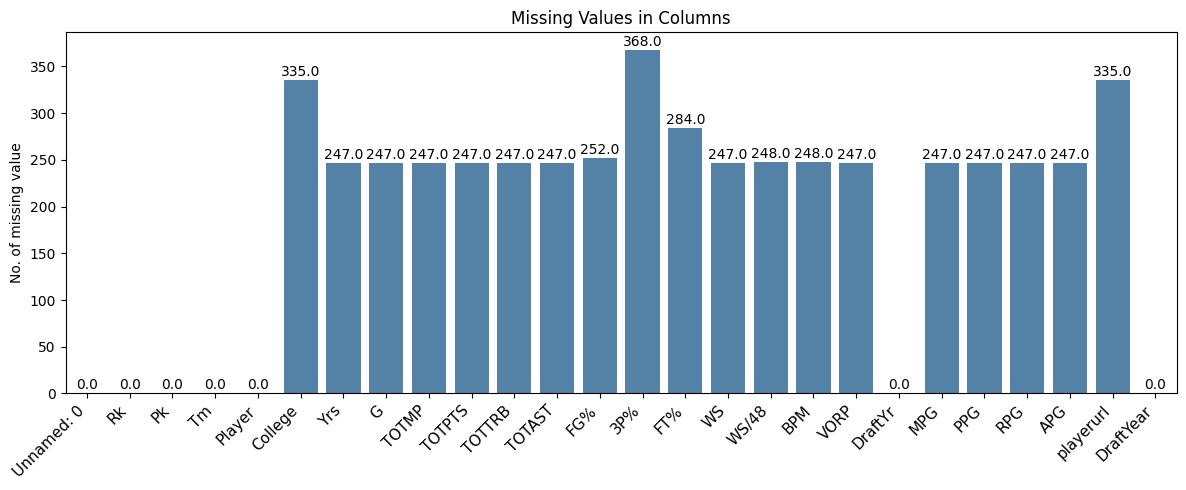

In [6]:
fig = plt.figure(figsize = (12,5))
 
# creating the bar plot
ax = sns.barplot(x = df.columns, y = df.isnull().sum(), color='steelblue')

for rect in ax.patches:
    ax.text(rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10)
    
plt.ylabel("No. of missing value")
plt.title("Missing Values in Columns")
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='medium',
    fontsize=11
)

fig.tight_layout()
plt.show()

In [7]:
# First, remove one of the identical columns
df.drop(['Unnamed: 0', 'Rk', 'DraftYr','playerurl'], axis=1, inplace=True)

In [8]:
# Fill in missing data of non-college players
df['College'].fillna('Other', inplace=True)

In [9]:
# cleaning rows with missing data
df.dropna(axis=0, inplace=True)

In [10]:
df.isnull().sum()

Pk           0
Tm           0
Player       0
College      0
Yrs          0
G            0
TOTMP        0
TOTPTS       0
TOTTRB       0
TOTAST       0
FG%          0
3P%          0
FT%          0
WS           0
WS/48        0
BPM          0
VORP         0
MPG          0
PPG          0
RPG          0
APG          0
DraftYear    0
dtype: int64

In [11]:
# num of data samples after data cleaning
df.shape

(1483, 22)

### Data Visualization

In [12]:
fig = make_subplots(rows=3, cols=6,y_title='Frequency',)

for idx, col in enumerate(df.columns[4:]):
    if idx < 6:
        
        fig.add_trace(
            go.Histogram(x=df[col], 
                         name=col),
            row=1, col=1+idx
        )
    elif 6 <= idx < 12:
        fig.add_trace(
            go.Histogram(x=df[col], 
                         name=col),
            row=2, col=1+(idx-6)
        )
    else:
        fig.add_trace(
            go.Histogram(x=df[col],
                        name=col),
            row=3, col=1+(idx-12)
        )

fig.update_layout(height=1000, width=1200, title_text="Data Frequency Distribution")
fig.show()

In [13]:
fig = go.Figure(go.Bar(
            x=df[df['College']!= 'Other']['College'].value_counts().index,
            y=df[df['College']!= 'Other']['College'].value_counts().values,
            marker={'color': 'red'},
            orientation='v'))

fig.update_layout(height=600, width=1200, title_text='College Leader in Player',xaxis_title='Colleges',yaxis_title='Counts')
fig.show()

In [14]:
college_col = df['College'].copy()
college_col[college_col != 'Other'] = 'College/University'

fig = px.pie(values=college_col.value_counts().values, names=college_col.value_counts().index)
fig.update_layout(height=400, width=900, title_text='College and Non-college Drafts')
fig.show()

In [15]:
fig = go.Figure(go.Bar(
            x=df['Tm'].value_counts().values,
            y=df['Tm'].value_counts().index,
            marker={'color': 'blue'},
            orientation='h'))

fig.update_layout(height=600, width=1000, title_text='NBA Team Leader in Player',xaxis_title='Counts',yaxis_title='Teams (alias)')
fig.show()

In [16]:
color_palette = px.colors.qualitative.Alphabet + px.colors.qualitative.Pastel1[:4]

In [17]:
fig = px.scatter(df, x="G", y="Pk", animation_frame="DraftYear", animation_group="Player",
            size='TOTPTS', color="Tm",hover_name="Player",
           log_x=True, size_max=55, range_x=[10,2000], range_y=[1,60],color_discrete_sequence =color_palette)


fig.update_layout(height=600, width=1000, title_text="Player Statistics by Year")

fig["layout"].pop("updatemenus")
fig.show()

In [18]:
fig = make_subplots(rows=1, cols=3)

fig.add_trace(
            go.Box(y=df['3P%'],
                   name='3P%'),
            row=1, col=1
        )

fig.add_trace(
            go.Box(y=df['FG%'],
                   name='FG%'
                  ),
            row=1, col=2
        )

fig.add_trace(
            go.Box(y=df['FT%'],
                    name='FT%'),
            row=1, col=3
        )

fig.update_layout(height=600, width=800, title_text="Percentage Statistical Values")
fig.show()

In [19]:
draftyr_mean = df.groupby('DraftYear').mean() # Averages of columns by category in the draft year

In [20]:
fig = make_subplots(rows=1, cols=2, x_title='Years')

fig.add_trace(
            go.Scatter(
                    x = df['DraftYear'].unique(),
                    y = draftyr_mean['3P%']*100,
                    mode = "lines+markers",
                    name = "Three-point average",
                    marker = dict(color = 'rgba(26, 83, 255, 0.8)'),
                    text= '3P%'),
            row=1, col=1
        )

fig.add_trace(
            go.Scatter(
                    x = df['DraftYear'].unique(),
                    y = draftyr_mean['FT%']*100,
                    mode = "lines+markers",
                    name = "Free throw average",
                    marker = dict(color = 'rgba(90, 212, 90, 1)'),
                    text= 'FT%'),
            row=1, col=2
        )

fig.update_layout(height=500, width=1000, title_text="Evolution of Three Point & Free Throw Percent Averages")
fig.show()

In [21]:
Mp = df.sort_values(by=['TOTMP'],ascending=False)
Pts = df.sort_values(by=['TOTPTS'],ascending=False)
Rb = df.sort_values(by=['TOTTRB'],ascending=False)
Ast = df.sort_values(by=['TOTAST'],ascending=False)
Ws = df.sort_values(by=['WS'],ascending=False)

In [22]:
fig = make_subplots(rows=4, cols=1,x_title='Players')

fig.add_trace(
            go.Scatter(
                    x = Pts['Player'].iloc[:10],
                    y = Pts['TOTPTS'].iloc[:10],
                    mode = "lines+markers",
                    name = "Score Leaders",
                    marker = dict(color = 'rgba(234, 85, 69, 1)'),
                    text= 'Score'),
            row=1, col=1
        )

fig.add_trace(
            go.Scatter(
                    x = Ast['Player'].iloc[:10],
                    y = Ast['TOTAST'].iloc[:10],
                    mode = "lines+markers",
                    name = "Assist Leaders",
                    marker = dict(color = 'rgba(80, 26, 80, 0.8)'),
                    text= 'Assist'),
            row=2, col=1
        )

fig.add_trace(
            go.Scatter(
                    x = Rb['Player'].iloc[:10],
                    y = Rb['TOTTRB'].iloc[:10],
                    mode = "lines+markers",
                    name = "Rebound Leaders",
                    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
                    text= 'Reabound'),
            row=3, col=1
        )

fig.add_trace(
            go.Scatter(
                    x = Mp['Player'].iloc[:10],
                    y = Mp['TOTMP'].iloc[:10],
                    mode = "lines+markers",
                    name = "Minutes Played",
                    marker = dict(color = 'rgba(237, 191, 51, 1)'),
                    text= 'Minutes'),
            row=4, col=1
        )

fig.update_layout(height=1000, width=900, title_text="Total Score Assist Rebound & Minute Played Leaders")
fig.update_annotations(yshift=-50)
fig.show()

In [23]:
fig = go.Figure(go.Bar(
            x=Ws['Player'].iloc[:10],
            y=Ws['WS'].iloc[:10],
            marker={'color': 'red'},
            orientation='v'))

fig.update_layout(height=500, width=900, title_text='Win Share Leaders',xaxis_title='Players',yaxis_title='Win Share')
fig.show()

#### Correlation Analysis
Let's see correlation between different features

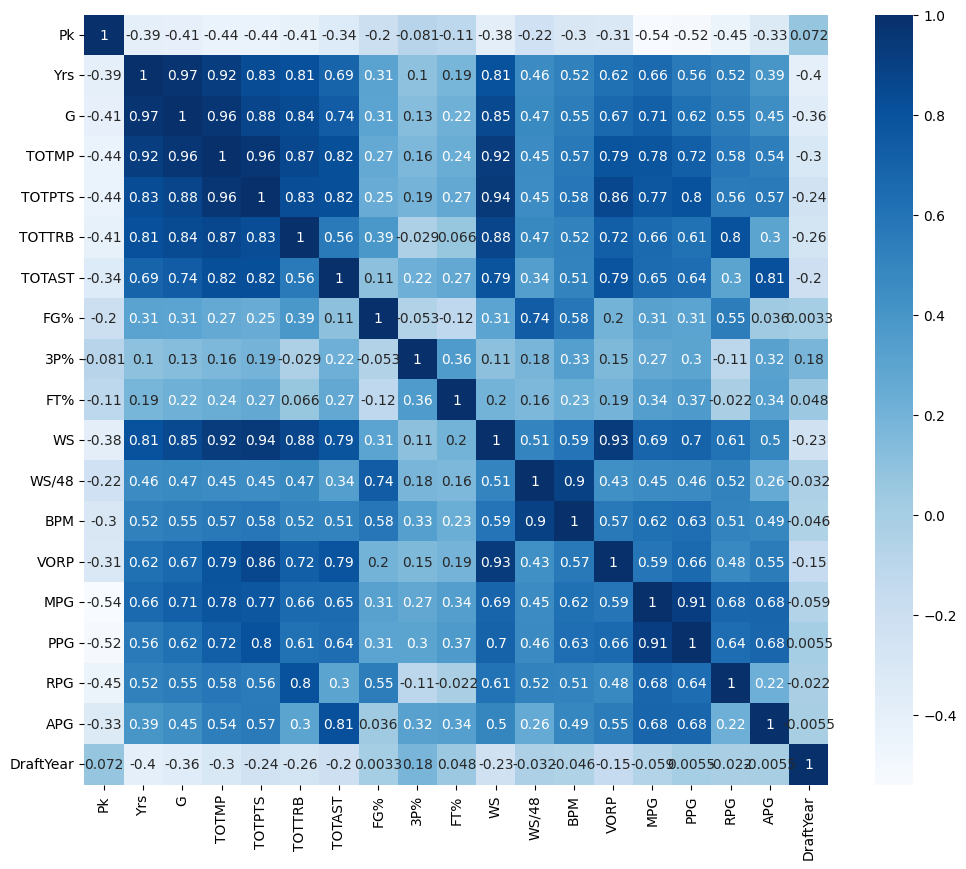

In [24]:
fig=plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot= True, cmap='Blues')
plt.show()

## Salary Prediction from Player Statistics

In [25]:
# Data Splitting
from sklearn.model_selection import train_test_split, cross_validate

# Model Evaluation
from sklearn.metrics import mean_squared_error, r2_score

# Feature Scaling
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xg

from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [26]:
salary_stat_data = pd.read_csv("nba-stats-salary-rating.csv")
salary_stat_data.head()

Unnamed: 0                 Player  Ratings     Salaries Pos  Age   Tm   G  \
0           0           LeBron James       97  $37,436,858  PG   35  LAL  60   
1           1          Kawhi Leonard       97  $32,742,000  SF   28  LAC  51   
2           2  Giannis Antetokounmpo       96  $25,842,697  PF   25  MIL  57   
3           3           James Harden       96  $38,199,000  SG   30  HOU  61   
4           4          Stephen Curry       95  $40,231,758  PG   31  GSW   5   

   GS    MP  ...    FT%  ORB   DRB   TRB   AST  STL  BLK  TOV   PF   PTS  
0  60  34.9  ...  0.697  1.0   6.9   7.9  10.6  1.2  0.5  4.0  1.8  25.7  
1  51  32.2  ...  0.889  1.0   6.3   7.3   5.0  1.8  0.6  2.7  1.9  26.9  
2  57  30.9  ...  0.633  2.3  11.5  13.7   5.8  1.0  1.0  3.7  3.0  29.6  
3  61  36.7  ...  0.861  1.0   5.3   6.4   7.4  1.7  0.9  4.5  3.4  34.4  
4   5  27.8  ...  1.000  0.8   4.4   5.2   6.6  1.0  0.4  3.2  2.2  20.8  

[5 rows x 32 columns]

In [27]:
salary_stat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445 entries, 0 to 444
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  445 non-null    int64  
 1   Player      445 non-null    object 
 2   Ratings     445 non-null    int64  
 3   Salaries    445 non-null    object 
 4   Pos         445 non-null    object 
 5   Age         445 non-null    int64  
 6   Tm          445 non-null    object 
 7   G           445 non-null    int64  
 8   GS          445 non-null    int64  
 9   MP          445 non-null    float64
 10  FG          445 non-null    float64
 11  FGA         445 non-null    float64
 12  FG%         444 non-null    float64
 13  3P          445 non-null    float64
 14  3PA         445 non-null    float64
 15  3P%         425 non-null    float64
 16  2P          445 non-null    float64
 17  2PA         445 non-null    float64
 18  2P%         440 non-null    float64
 19  eFG%        444 non-null    f

In [28]:
# removing unused variables
salary_stat_data.drop(['Unnamed: 0','Ratings','Tm','GS','FG','3P','3P%','2P','2P%','FT%','eFG%'], axis=1, inplace=True)

In [29]:
cols = salary_stat_data.columns.values[1:] + '_19/20' # rename feature for a single season except Player column
salary_stat_data.columns.values[1:] = cols

In [30]:
salary_stat_data.head()

Player Salaries_19/20 Pos_19/20  Age_19/20  G_19/20  \
0           LeBron James    $37,436,858        PG         35       60   
1          Kawhi Leonard    $32,742,000        SF         28       51   
2  Giannis Antetokounmpo    $25,842,697        PF         25       57   
3           James Harden    $38,199,000        SG         30       61   
4          Stephen Curry    $40,231,758        PG         31        5   

   MP_19/20  FGA_19/20  FG%_19/20  3PA_19/20  2PA_19/20  ...  FTA_19/20  \
0      34.9       19.6      0.498        6.4       13.3  ...        5.7   
1      32.2       19.9      0.469        5.7       14.2  ...        6.9   
2      30.9       20.0      0.547        4.8       15.2  ...       10.0   
3      36.7       22.7      0.435       12.6       10.1  ...       11.8   
4      27.8       16.4      0.402        9.8        6.6  ...        5.2   

   ORB_19/20  DRB_19/20  TRB_19/20  AST_19/20  STL_19/20  BLK_19/20  \
0        1.0        6.9        7.9       10.6        1.2        0.5   
1        1.0        6.3        7.3        5.0        1.8        0.6   
2        2.3       11.5       13.7        5.8        1.0        1.0   
3        1.0        5.3        6.4        7.4        1.7        0.9   
4        0.8        4.4        5.2        6.6        1.0        0.4   

   TOV_19/20  PF_19/20  PTS_19/20  
0        4.0       1.8       25.7  
1        2.7       1.9       26.9  
2        3.7       3.0       29.6  
3        4.5       3.4       34.4  
4        3.2       2.2       20.8  

[5 rows x 21 columns]

In [31]:
player_stat_salary_data = pd.merge(df, salary_stat_data, how='inner', on='Player') # merge datasets based on player names

In [32]:
player_stat_salary_data.head()

Pk   Tm          Player    College   Yrs       G    TOTMP   TOTPTS  \
0   2  LAC  Tyson Chandler      Other  19.0  1160.0  31617.0   9509.0   
1   1  CLE    LeBron James      Other  19.0  1351.0  51563.0  36559.0   
2  51  BRK     Kyle Korver  Creighton  17.0  1232.0  31183.0  11953.0   
3   9  PHI  Andre Iguodala    Arizona  18.0  1218.0  39309.0  13934.0   
4  43  NYK    Trevor Ariza       UCLA  18.0  1114.0  32876.0  11576.0   

    TOTTRB  TOTAST  ...  FTA_19/20  ORB_19/20  DRB_19/20  TRB_19/20  \
0  10467.0   967.0  ...        0.5        1.0        1.6        2.5   
1  10075.0  9962.0  ...        5.7        1.0        6.9        7.9   
2   3643.0  2114.0  ...        0.7        0.3        1.8        2.1   
3   6016.0  5113.0  ...        0.6        0.7        3.1        3.8   
4   5341.0  2375.0  ...        1.4        0.6        4.0        4.6   

   AST_19/20  STL_19/20  BLK_19/20  TOV_19/20  PF_19/20  PTS_19/20  
0        0.2        0.2        0.3        0.3       1.2        1.3  
1       10.6        1.2        0.5        4.0       1.8       25.7  
2        1.2        0.4        0.2        0.8       1.4        6.7  
3        2.0        0.6        1.1        1.2       2.0        4.4  
4        1.7        1.3        0.3        1.1       2.1        8.0  

[5 rows x 42 columns]

In [33]:
# player_stat_salary_data = player_stat_salary_data[player_stat_salary_data['Yrs'] + player_stat_salary_data['DraftYear'] >= 2020] # Checking if the player is an active player

In [34]:
player_stat_salary_data.drop(['College'],axis=1,inplace=True) # remove college col

In [35]:
player_stat_salary_data['Salaries_19/20'] = player_stat_salary_data['Salaries_19/20'].str.replace('[\$,]', '').astype(float) # change salaries col format

In [36]:
player_stat_salary_data['Salaries_19/20'] = player_stat_salary_data['Salaries_19/20'] /1000000 #transform salary to 'million'
player_stat_salary_data['Salaries_19/20']

0       2.564753
1      37.436858
2       6.004753
3      17.185185
4      12.200000
         ...    
358     1.000000
359     0.898310
360     0.898310
361     1.000000
362     0.898310
Name: Salaries_19/20, Length: 363, dtype: float64

In [37]:
player_stat_salary_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 363 entries, 0 to 362
Data columns (total 41 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Pk              363 non-null    int64  
 1   Tm              363 non-null    object 
 2   Player          363 non-null    object 
 3   Yrs             363 non-null    float64
 4   G               363 non-null    float64
 5   TOTMP           363 non-null    float64
 6   TOTPTS          363 non-null    float64
 7   TOTTRB          363 non-null    float64
 8   TOTAST          363 non-null    float64
 9   FG%             363 non-null    float64
 10  3P%             363 non-null    float64
 11  FT%             363 non-null    float64
 12  WS              363 non-null    float64
 13  WS/48           363 non-null    float64
 14  BPM             363 non-null    float64
 15  VORP            363 non-null    float64
 16  MPG             363 non-null    float64
 17  PPG             363 non-null    flo

In [38]:
fig = px.histogram(player_stat_salary_data, x="Salaries_19/20")
fig.update_layout(height=400, width=800,title_text="Salary Distribution",xaxis_title='Salary (million)')
fig.show()

In [39]:
cols = [col for col in player_stat_salary_data.columns if '_19/20' in col]
cols.remove('Pos_19/20')
cols.remove('Salaries_19/20')

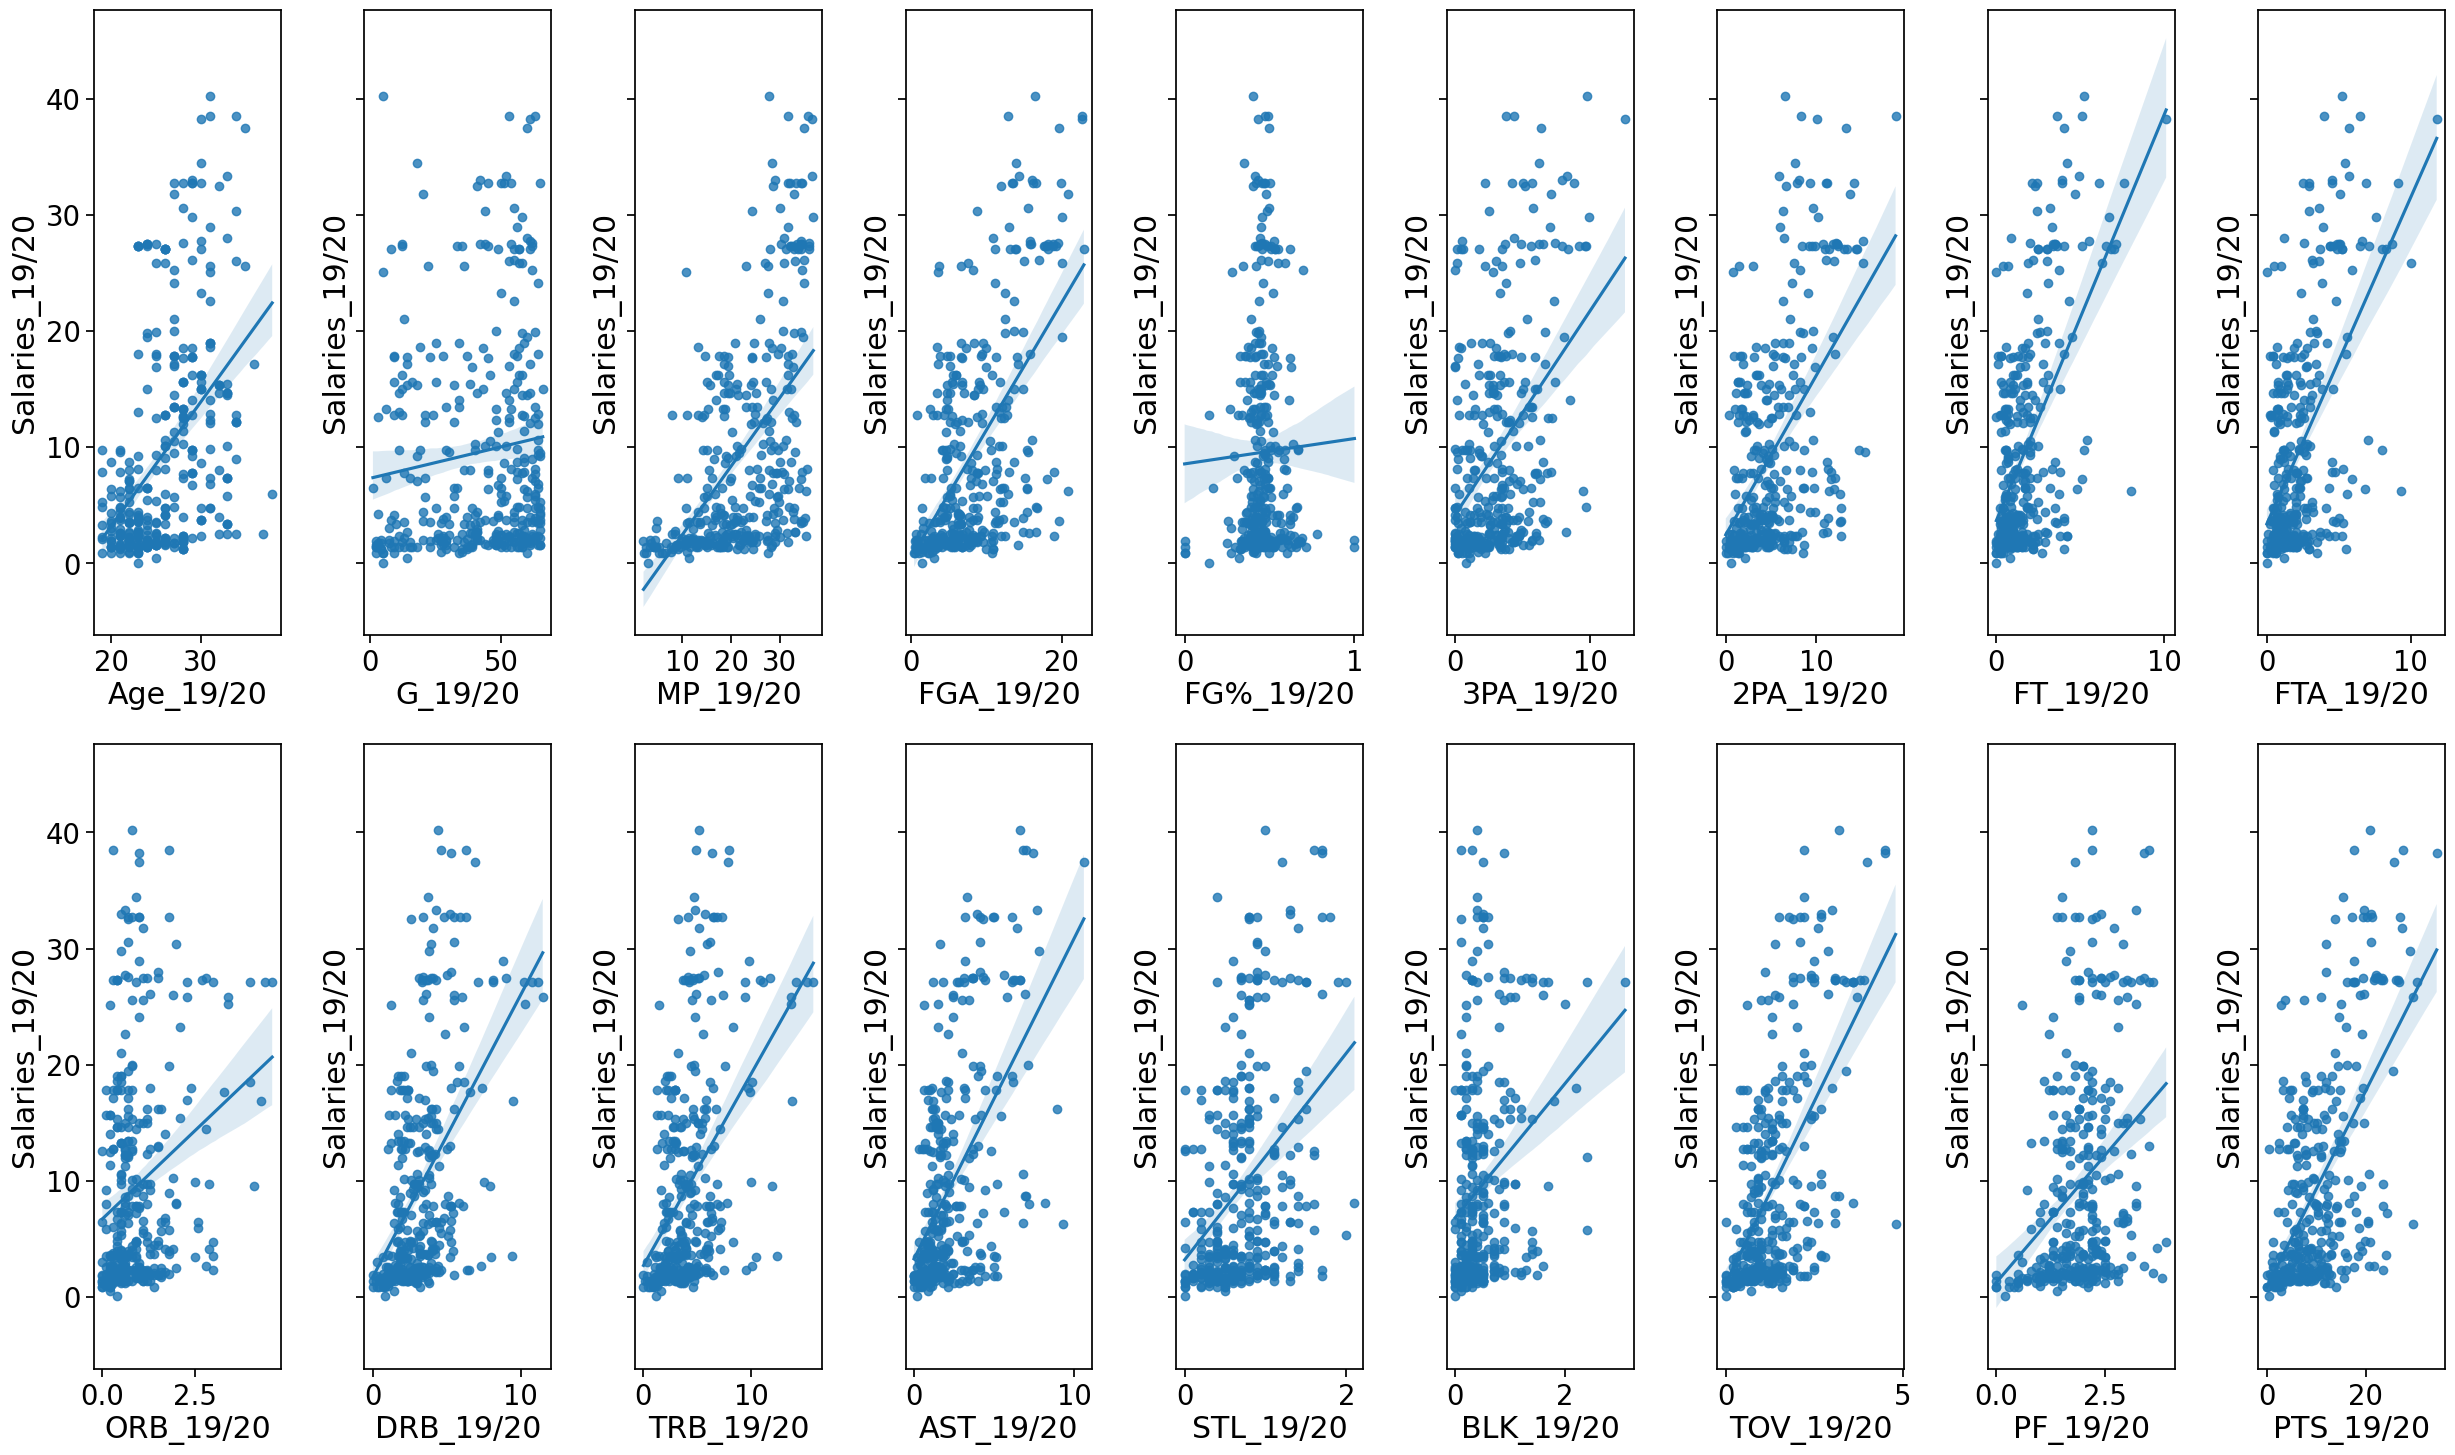

In [40]:
sns.set_context('notebook', font_scale=1.8)
fig,ax = plt.subplots(2, 9, figsize=(25, 15), sharey=True)
axes = ax.flatten()

for i in range(len(axes)):
    sns.regplot(data=player_stat_salary_data, x=cols[i], y='Salaries_19/20', ax = axes[i] )
    axes[i].set_xlabel(cols[i])

fig.tight_layout()
plt.show()


###  Merged Dataset Pre-processing

#### Features Separating

In [41]:
# Set variables for the targets and features
X = player_stat_salary_data.drop(['Player','Salaries_19/20'], axis=1)
y = player_stat_salary_data['Salaries_19/20']

In [42]:
def label_encoding(df,column_name):
    label_encoder = LabelEncoder()
    df[column_name] = label_encoder.fit_transform(df[column_name])

In [43]:
label_encoding(X,'Tm'); label_encoding(X,'Pos_19/20')

In [44]:
# label encoded columns
d1 = player_stat_salary_data.loc[:,['Tm','Pos_19/20']] 
d2 = X.loc[:,['Tm','Pos_19/20']] 
pd.concat([d1, d2],axis=1)

Tm  Pos_19/20  Tm  Pos_19/20
0    LAC          C  12          0
1    CLE         PG   5          4
2    BRK         SF   2          5
3    PHI         SG  22          8
4    NYK         SF  19          5
..   ...        ...  ..        ...
358  PHI         SF  22          5
359  ORL         SG  21          8
360  SAC         SF  25          5
361  LAC         SG  12          8
362  GSW         SG   9          8

[363 rows x 4 columns]

#### Data Normalization 
- data normalization will be performed to normalize the range of independent variables or features of data.
- we will use min-max normalization

 $$x' = \frac{x - \min(x)}{\max(x) - min(x)} \$$

In [45]:
scaler = MinMaxScaler().fit(X)
X_norm = scaler.transform(X)

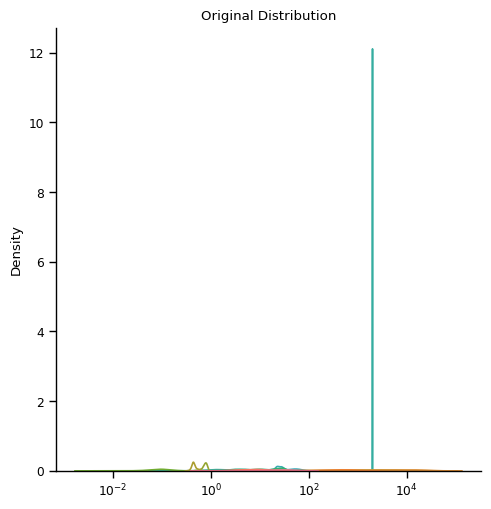

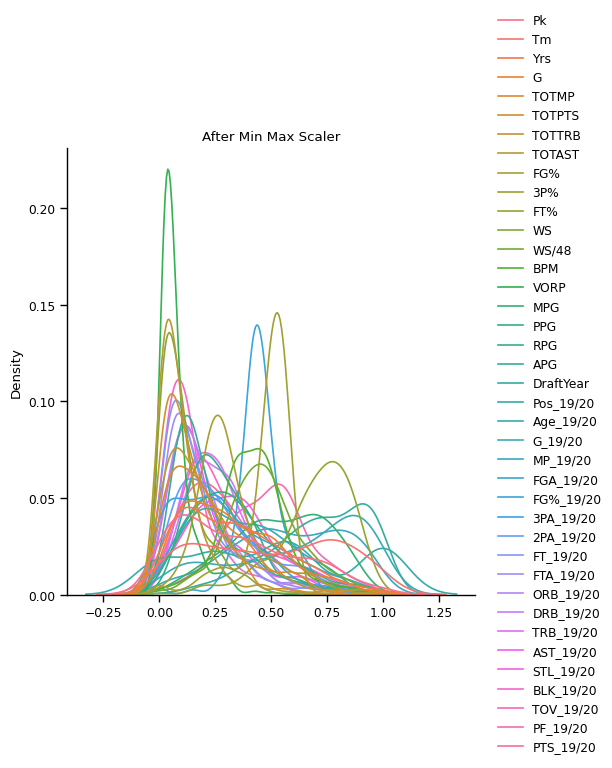

In [50]:
# review data distribution after min-max scaling
sns.set_context('paper', font_scale=1)
X_norm_df = pd.DataFrame(data=X_norm, columns = X.columns)
sns.displot(data=X, kind="kde",log_scale=True,legend=False).set(title='Original Distribution')
sns.displot(data = X_norm_df,kind="kde").set(title='After Min Max Scaler')
plt.show()

#### Splitting the Dataset

In [51]:
#split 90% of the data to train
X_norm_train, X_norm_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.1, random_state=4)

# quick review to data shapes of train and test 
print ('The shape of X_train is:', X_norm_train.shape)
print ('The shape of X_test is:', X_norm_test.shape)
print ('The shape of y_train is: ', y_train.shape)
print ('The shape of y_test is:', y_test.shape)

The shape of X_train is: (326, 39)
The shape of X_test is: (37, 39)
The shape of y_train is:  (326,)
The shape of y_test is: (37,)


### Model Implementation
We will implement various machine learning models in this section.
- Linear Regression
- Random Forest
- Decision Tree Regression 
- XGBoost

#### Linear Regression

In [52]:
# Instantiate the model
linreg = LinearRegression()

# Fit the model
linreg.fit(X_norm_train, y_train)

# Model Predictions
y_pred_train_lr = linreg.predict(X_norm_train)
y_pred_test_lr = linreg.predict(X_norm_test)


# model error on train and test data
err_train_linreg = mean_squared_error(y_train,y_pred_train_lr)
err_test_linreg = mean_squared_error(y_test,y_pred_test_lr)
# model score on train and test data
scr_train_linreg = r2_score(y_train,y_pred_train_lr)
scr_test_linreg = r2_score(y_test,y_pred_test_lr)

print(" "*8+"Linear Regression"+"\n"+"-"*35)
print('Train set error:',err_train_linreg)
print('Train set score:',scr_train_linreg)
print('Test set error:',err_test_linreg)
print('Test set score:',scr_test_linreg)

        Linear Regression
-----------------------------------
Train set error: 26.44988655196717
Train set score: 0.711433886601339
Test set error: 28.34090845972704
Test set score: 0.5571924410181472


In [53]:
def plot_prediciton(y_test,y_predict,model_name):
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=list(range(len(y_predict))), y=y_predict,
                             mode='lines',
                             name='Prediction'))
    fig.add_trace(go.Scatter(x=list(range(len(y_test))), y=y_test,
                             mode='lines',
                             name='True value'))
    fig.update_layout(height=500, width=900, title_text=model_name,xaxis_title='Index',yaxis_title='Salary (Million)')
    fig.show()

In [54]:
plot_prediciton(y_test,y_pred_test_lr,'Linear Regression')

#### Random Forest Regression

In [55]:
def model_evaluation(model,model_name):
    model.fit(X_norm_train, y_train)

    # Model Predictions
    y_pred_train = model.predict(X_norm_train)
    y_pred_test = model.predict(X_norm_test)


    # model error on train and test data
    err_train = mean_squared_error(y_train,y_pred_train)
    err_test = mean_squared_error(y_test,y_pred_test)
    # model score on train and test data
    scr_train = r2_score(y_train,y_pred_train)
    scr_test = r2_score(y_test,y_pred_test)
    
    print(" "*6+model_name+"\n"+"-"*35)
    print('Train set error:',err_train)
    print('Train set score:',scr_train)
    print('Test set error:',err_test)
    print('Test set score:',scr_test)
    
    return err_train, err_test, scr_train, scr_test, y_pred_train, y_pred_test

In [56]:
model_evaluation(RandomForestRegressor(),"Random Forest Regressor")
print("-"*35)

      Random Forest Regressor
-----------------------------------
Train set error: 2.1667996732041663
Train set score: 0.976360391603891
Test set error: 14.744472877254902
Test set score: 0.7696275667193535
-----------------------------------


#### Random Forest Parameter Tuning

In [57]:
# Define the parameter grid to search through
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 5, 10],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to the data
grid_search.fit(X_norm_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Score: -17.302373167385507


In [59]:
# model eval after parameter tunning
err_train_rf, err_test_rf, scr_train_rf, scr_test_rf, y_pred_train_rf, y_pred_test_rf = model_evaluation(RandomForestRegressor(**best_params),"Random Forest Regressor")

      Random Forest Regressor
-----------------------------------
Train set error: 2.2267870954332913
Train set score: 0.9757059337009637
Test set error: 14.575727659639568
Test set score: 0.7722640968082986


#### Random Forest Feature Importance

In [60]:
# view the feature scores
Rf = RandomForestRegressor(**best_params).fit(X_norm_train, y_train)
feature_scores = pd.Series(Rf.feature_importances_, index=X.columns).sort_values(ascending=False)
feature_scores

VORP         0.237023
TOTPTS       0.204003
TOTMP        0.173371
WS           0.035018
MP_19/20     0.034669
TOTAST       0.025374
MPG          0.024131
Pk           0.022848
FTA_19/20    0.022546
G            0.017331
BPM          0.016684
PTS_19/20    0.015784
2PA_19/20    0.012574
Tm           0.011693
FGA_19/20    0.010880
PPG          0.009146
DraftYear    0.008622
APG          0.008574
AST_19/20    0.007583
RPG          0.007362
DRB_19/20    0.007220
FT_19/20     0.006664
FG%_19/20    0.006597
FT%          0.006438
Yrs          0.006386
WS/48        0.005978
ORB_19/20    0.005817
BLK_19/20    0.005619
3PA_19/20    0.005192
G_19/20      0.005093
TOTTRB       0.005011
TRB_19/20    0.004688
TOV_19/20    0.004412
PF_19/20     0.004323
3P%          0.004224
STL_19/20    0.003459
Age_19/20    0.003264
FG%          0.003177
Pos_19/20    0.001222
dtype: float64

#### Visualize Feature Importance

In [61]:
f, ax = plt.subplots(figsize=(30, 20))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

In [62]:
plot_prediciton(y_test,y_pred_test_rf,"Random Forest Regressor")

#### Decision Tree Regression

In [63]:
model_evaluation(DecisionTreeRegressor(max_depth=4, min_samples_split=5,max_leaf_nodes=10),"Decision Tree Regression")
print('-'*35)

      Decision Tree Regression
-----------------------------------
Train set error: 15.584103721535994
Train set score: 0.8299786945063177
Test set error: 29.772153995213017
Test set score: 0.5348301958991238
-----------------------------------


#### Decision Tree Parameter tuning

In [64]:
param_grid = {"min_samples_split": [5,10, 20, 40],
              "max_depth": [2, 4, 6, 8],
              "min_samples_leaf": [10,20, 40, 100],
              "max_leaf_nodes": [5, 10, 20, 100],
              }

grid_cv_dtr = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')

grid_cv_dtr.fit(X_norm_train,y_train)
# Get the best parameters and best score
best_params = grid_cv_dtr.best_params_
best_score = grid_cv_dtr.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'max_depth': 4, 'max_leaf_nodes': 10, 'min_samples_leaf': 10, 'min_samples_split': 20}
Best Score: -29.03828659012541


In [65]:
err_train_dtr, err_test_dtr, scr_train_dtr, scr_test_dtr,y_pred_train_dtr, y_pred_test_dtr = model_evaluation(DecisionTreeRegressor(**best_params),"Decision Tree Regressor")

      Decision Tree Regressor
-----------------------------------
Train set error: 16.641578353314973
Train set score: 0.818441732186627
Test set error: 29.1942676938684
Test set score: 0.5438592791704342


In [66]:
plot_prediciton(y_test,y_pred_test_dtr,"Decision Tree Regressor")

#### XGBoost  Regression

In [67]:
model = xg.XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
model_evaluation(model,"XGBoost")
print('-'*35)

      XGBoost
-----------------------------------
Train set error: 1.9030629824126236e-07
Train set score: 0.9999999979237737
Test set error: 16.624105434657917
Test set score: 0.7402595771325278
-----------------------------------


#### XGBoost Parameter tuning

In [68]:
param_grid = {"max_depth":    [4, 5, 6],
              "n_estimators": [500, 600, 700],
              "learning_rate": [0.01, 0.015]}

grid_cv_xg = GridSearchCV(xg.XGBRegressor(), param_grid, cv=5).fit(X_norm_train, y_train)

best_params = grid_cv_xg.best_params_
best_score = grid_cv_xg.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)
print("The best hyperparameters are ",grid_cv_xg.best_params_)

Best Parameters: {'learning_rate': 0.015, 'max_depth': 4, 'n_estimators': 700}
Best Score: 0.8169575275583153
The best hyperparameters are  {'learning_rate': 0.015, 'max_depth': 4, 'n_estimators': 700}


In [69]:
err_train_xg, err_test_xg, scr_train_xg, scr_test_xg, y_pred_train_xg, y_pred_test_xg = model_evaluation(xg.XGBRegressor(**best_params),"XGBoost")

      XGBoost
-----------------------------------
Train set error: 0.41374405454161484
Train set score: 0.9954860859789965
Test set error: 14.120727380655651
Test set score: 0.7793731689525184


In [70]:
plot_prediciton(y_test,y_pred_test_xg,"XGBoost")

### Model Comparison

In [71]:
models_comp = pd.DataFrame([['Linear Regression', scr_train_linreg, scr_test_linreg ], 
                                      ['Random Forest Regression', scr_train_rf, scr_test_rf], 
                                      [ 'Decision Tree Regression', scr_train_dtr, scr_test_dtr],
                                      [ 'XGBoost', scr_train_xg, scr_test_xg]],
                                      columns=['Models', 'Train set', 'Test set'])

models_comp.sort_values(by='Test set', ascending=False).style.background_gradient(cmap='PuRd').hide_index().set_properties(**{'font-family': 'Segoe UI'})

In [72]:
fig = go.Figure(data=[
    go.Bar(name='Train', x=models_comp['Models'], y=models_comp['Train set']),
    go.Bar(name='Test', x=models_comp['Models'], y=models_comp['Test set'])
])
# Change the bar mode
fig.update_layout(barmode='group',title="Models Train & Test Scores",xaxis_title='Models',yaxis_title='Scores')
fig.show()